## Pipe3D access

In [9]:
#Run this cell twice. I don't know why.

import marvin
marvin.config.download = True
marvin.config.release = 'DR17'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from marvin.tools.vacs import VACs

from marvin import config #Needed to fix "Cube not subscriptable" when running in Sciserver
config.forceDbOff() #Needed to fix "Cube not subscriptable" when running in Sciserver

print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned, but if you see them re-run')

from astropy.io import fits

Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned, but if you see them re-run


In [7]:
manga_id = '1-604761'

maps = marvin.tools.Maps(manga_id)
plateifu=maps.plateifu
print(plateifu)

8135-12701


In [10]:
#To read about fits io https://docs.astropy.org/en/stable/io/fits/index.html
# Data model for HDU1: https://data.sdss.org/datamodel/files/MANGA_PIPE3D/MANGADRP_VER/PIPE3D_VER/PLATE/manga.Pipe3D.cube.html#hdu1

pipe3dlink='https://data.sdss.org/sas/dr17/manga/spectro/pipe3d/v3_1_1/3.1.1/8135/manga-8135-12701.Pipe3D.cube.fits.gz'
hdul = fits.open(pipe3dlink)

In [27]:
mass=hdul[1].data[19] 
metal=hdul[1].data[9] 
#Extension 19 in HDU 1 is "Stellar Mass density per pixel with dust correction" in units log10(Msun/spaxels^2)
# Extension 9 in HDU1 is "Mass Weighted metallicity of the stellar population"

In [18]:
mass

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

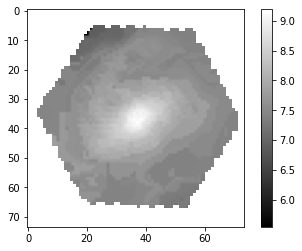

In [28]:
plt.figure()
plt.imshow(mass, cmap='gray')
plt.colorbar()

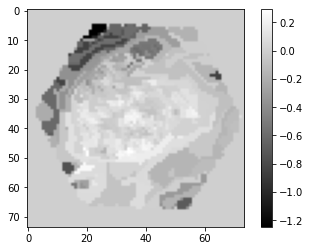

In [29]:
plt.figure()
plt.imshow(metal, cmap='gray')
plt.colorbar()

(0.0, 2.5)

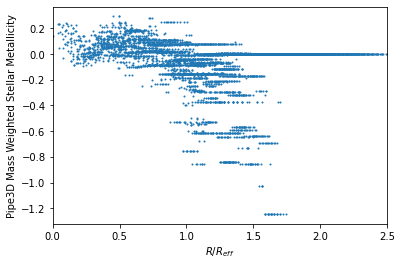

In [32]:
#Plot a gradient of the stellar metallicity 

radius = maps.spx_ellcoo_r_re
plt.scatter(radius.value,metal,s=1)
plt.xlabel(r'$ R/R_{eff} $')
plt.ylabel('Pipe3D Mass Weighted Stellar Metallicity')
plt.xlim(0,2.5)